In [ ]:
!pip install cmake==3.25.2
!pip install dlib==19.24.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: cmake
    Found existing installation: cmake 3.27.9
    Uninstalling cmake-3.27.9:
      Successfully uninstalled cmake-3.27.9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.7 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [ ]:
!pip install face_recognition

In [ ]:
!pip install keyboard

In [ ]:
import cv2
import face_recognition
import numpy as np
import os
import threading
import keyboard
import ipywidgets as widgets
from IPython.display import display, clear_output
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:

# Flag to indicate if 'q' has been pressed
stop_flag = False

In [ ]:
# Function to handle closing OpenCV windows without warnings
def safe_close_cv_windows():
    try:
        cv2.destroyAllWindows()
    except Exception as e:
        print(f"Exception while closing OpenCV windows: {e}")

In [ ]:

# Function to load known faces
def load_known_faces(folder):
    known_encodings = []
    known_names = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(folder, filename)
            image = face_recognition.load_image_file(image_path)
            encoding = face_recognition.face_encodings(image)
            if encoding:
                known_encodings.append(encoding[0])
                name = os.path.splitext(filename)[0]  # Use filename without extension as the name
                known_names.append(name)
    return known_encodings, known_names

In [ ]:
# Function to match faces
def match_faces(from_image_path, to_image_folder, threshold, known_encodings, known_names):
    image = face_recognition.load_image_file(from_image_path)
    image_encodings = face_recognition.face_encodings(image)

    matched_faces = []

    for face_encoding in image_encodings:
        matches = face_recognition.compare_faces(known_encodings, face_encoding, tolerance=threshold)
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_names[best_match_index]
            to_image_path = os.path.join(to_image_folder, f"{name}.jpg")
            matched_faces.append((name, to_image_path))

    return matched_faces

In [ ]:
# Function to process a selected image and match it
def process_selected_image(from_image_path, threshold):
    results = match_faces(from_image_path, to_image_folder, threshold, known_face_encodings, known_face_names)
    display_results(results)

In [ ]:

# Function to display matching results
def display_results(results):
    result_text = ""
    for filename, name in results:
        result_text += f"Image name: {filename} - Image address: {name}\n"
        show_matching_images(name)

    with output:
        clear_output()
        print(result_text)

In [ ]:


# Function to show the matched image
def show_matching_images(matched_image_path):
    matched_image = cv2.imread(matched_image_path)
    cv2_imshow(matched_image)
    # print(matched_image)
    cv2.waitKey(0)  # Wait for any key press
    cv2.destroyAllWindows()

In [ ]:


# Function to update threshold and process selected image
def update_threshold(_):
    threshold = threshold_slider.value
    # Select an image from from_image_folder
    from_image_path = os.path.join(from_image_folder, 'aadhar.jpg')
    process_selected_image(from_image_path, threshold)

In [ ]:

# Function to monitor key presses (replace with your implementation)
def monitor_key_presses():
    global stop_flag
    try:
        while True:
            if keyboard.is_pressed('q'):
                stop_flag = True
                break
    except Exception as e:
        print(f"Exception in key press monitoring thread: {e}")

FloatSlider(value=0.7338584514863876, description='Threshold:', max=1.0, step=0.01)

Exception in key press monitoring thread: [Errno 2] No such file or directory: 'dumpkeys'

Button(description='Match Image', style=ButtonStyle())

Output()

Distance: 0.5013734513690923
Max Threshold: 0.7338584514863876
Symmetric Metric Used: Euclidean distance
Model Used: Face_recognition


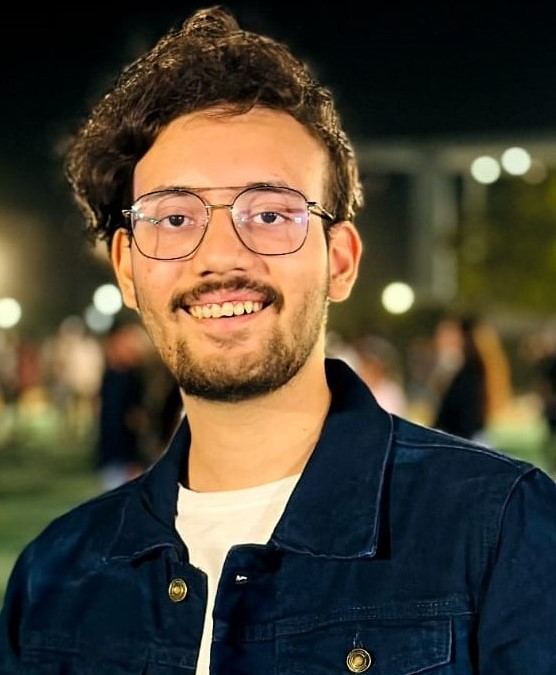

In [ ]:
# Load known faces
known_face_encodings, known_face_names = load_known_faces(to_image_folder)

# Load and encode aadhar.jpg
aadhar_image_path = '/content/from_image_folder/aadhar.jpg'
aadhar_image = face_recognition.load_image_file(aadhar_image_path)
face_encoding_aadhar = face_recognition.face_encodings(aadhar_image)[0]

# Calculate Euclidean distances
def calculate_euclidean_distance(face_encoding_aadhar, face_encoding_matched):
    if face_encoding_matched is not None:
        euclidean_distance = np.linalg.norm(face_encoding_aadhar - face_encoding_matched)
        return euclidean_distance
    else:
        return None

# Calculate distances to all known faces
distances = []
for known_encoding in known_face_encodings:
    distance = calculate_euclidean_distance(face_encoding_aadhar, known_encoding)
    if distance is not None:
        distances.append(distance)

# Calculate mean and standard deviation of distances
if distances:
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    k = 1
    max_threshold = mean_distance + k * std_distance
else:
    max_threshold = 'none'  # Default value if no known faces are present

symmetric_metric = "Euclidean distance"
model_used = "Face_recognition"

# Start the key press monitoring thread
stop_flag = False  # Define stop_flag here
key_monitor_thread = threading.Thread(target=monitor_key_presses)
key_monitor_thread.daemon = True
key_monitor_thread.start()

# Initialize widgets
threshold_slider = widgets.FloatSlider(value=max_threshold, min=0.0, max=1.0, step=0.01, description='Threshold:')
select_image_button = widgets.Button(description="Match Image")

# Register event listeners
select_image_button.on_click(update_threshold)

# Display widgets
display(threshold_slider)
display(select_image_button)

# Output widget
output = widgets.Output()
display(output)

# Function to check for the stop flag and close the OpenCV windows
def check_stop_flag():
    global stop_flag
    if stop_flag:
        safe_close_cv_windows()
    else:
        threading.Timer(0.1, check_stop_flag).start()

# Start checking for the stop flag
check_stop_flag()

# Assume the first known face is the matched face (replace with your actual matching logic)
face_encoding_matched = known_face_encodings[0] if known_face_encodings else None

# Calculate distance
distance = calculate_euclidean_distance(face_encoding_aadhar, face_encoding_matched)

# Output results


print(f"Distance: {distance}")
print(f"Max Threshold: {max_threshold}")
print(f"Symmetric Metric Used: {symmetric_metric}")
print(f"Model Used: {model_used}")


## Euclidean Distance takes into account both the magnitude and the direction of the vectors. It measures the actual straight-line distance between two points in space.
## Cosine Distance, on the other hand, only considers the angle between vectors, ignoring their magnitude. This can be advantageous in some scenarios where you only care about the direction of the vectors and not their length. However, in the context of face recognition, the magnitude can provide additional useful information about the facial features.

## The max threshold is calculated using the formula:
## threshold=μ+kσ

### where:
### μ is the mean distance of the non-matches (in this case, the distances between the aadhar face encoding and all known face encodings).
### σ is the standard deviation of these distances.
### k is a multiplier that determines the confidence level.
### Explanation:

## **Empirical Basis**: The calculation is based on the empirical distribution of distances. By taking the mean (μ) and adding a multiple of the standard deviation (kσ), you create a threshold that reflects the variability in the distances.
## **Confidence Level:** The multiplier k allows you to adjust the threshold based on the desired confidence level. A higher k means a more stringent threshold, reducing false positives but potentially increasing false negatives. Conversely, a lower k makes the threshold less stringent.

## **Adaptability**: This method adapts the threshold to the specific dataset. It accounts for variations in the embeddings and ensures that the threshold is not arbitrarily chosen but is grounded in statistical analysis.
## This approach ensures that the threshold is not too tight, which might lead to false negatives (correct matches being missed), nor too loose, which might lead to false positives (incorrect matches being accepted). The use of the mean and standard deviation provides a balance by considering the central tendency and the spread of the distances.